In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  


from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

C:\Users\dolin\AppData\Local\Temp\ipykernel_7784\2737221153.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('sample_traj_data.csv')

data.head()

data.dtypes

,alt,ve,vi
0,0.055914,0.000153,407.864668
1,0.055914,0.000089,407.864615
2,0.055914,0.000090,407.864557
3,0.055914,0.000079,407.864610
4,0.055914,0.000153,407.864556


alt    float64
ve     float64
vi     float64
dtype: object

In [3]:
def ascent_traj_disp(n, data):

    x_data = []
    y_data = []
    ref_y = 0

    if (n==1):
        ve_range = [0, 1200]

        traj_data = data[ (data['ve'].between(*ve_range))]

        x_data = traj_data['ve'].to_numpy()
        y_data = traj_data['alt'].to_numpy()
        ref_y = 45

    elif (n==2):
        vi_range = [1400, 8000]

        traj_data = data[ (data['vi'].between(*vi_range))]

        x_data = traj_data['vi'].to_numpy()
        y_data = traj_data['alt'].to_numpy()

        ref_y = 115
        
    

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax

    
    img = plt.imread("ascent_traj" + str(n) + "_bg.png")
    #img = plt.imread("ascent_traj_mask_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])
    
    plt_.scatter(
            ascent_traj_x_convert(n, x_data), 
            ascent_traj_y_convert(n, y_data, ref_y), 
            s=0.5
    )
    
    major_ticks = np.arange(0, 500, 100)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])




def ascent_traj_x_convert(n, val):
    out = 0
    if (n == 1):
        out = val*8e-4  + 0.13
    elif (n == 2):
        #out =  val/7000 - 0.06 
        out =  val**2*1.3e-08 + val*5e-5 + 0.05 
    
    return out * 380
    
def ascent_traj_y_convert(n, val, ref):
    out = 0
    if (n == 1):
        out = val / ref * 0.729 + 0.13
    elif (n == 2):
        vb = 45
        alp = 0.3995/(ref - vb)
        out = 0.207 + alp * (val - vb)
    return 50 + 300 * out

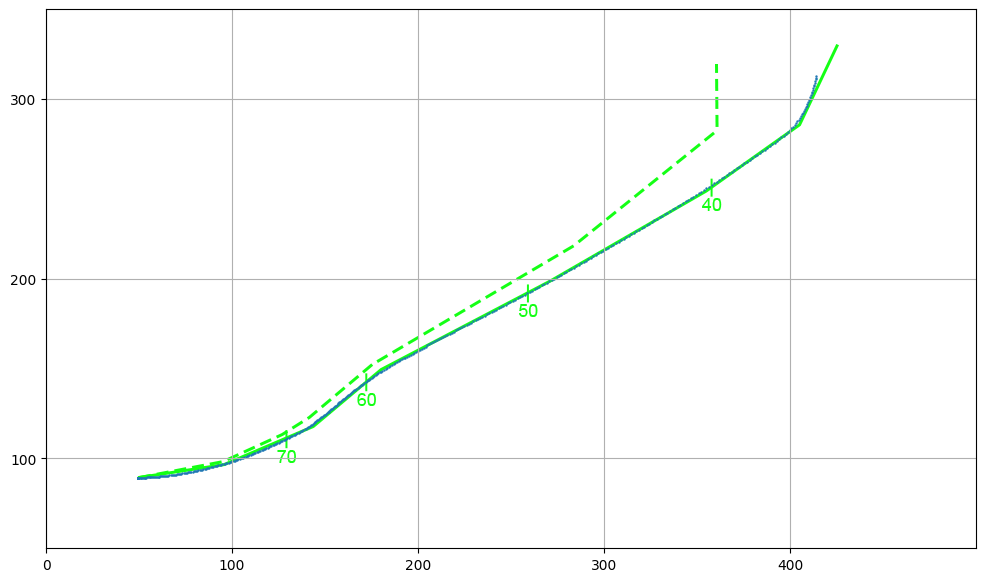

In [6]:
ascent_traj_disp(1, data)

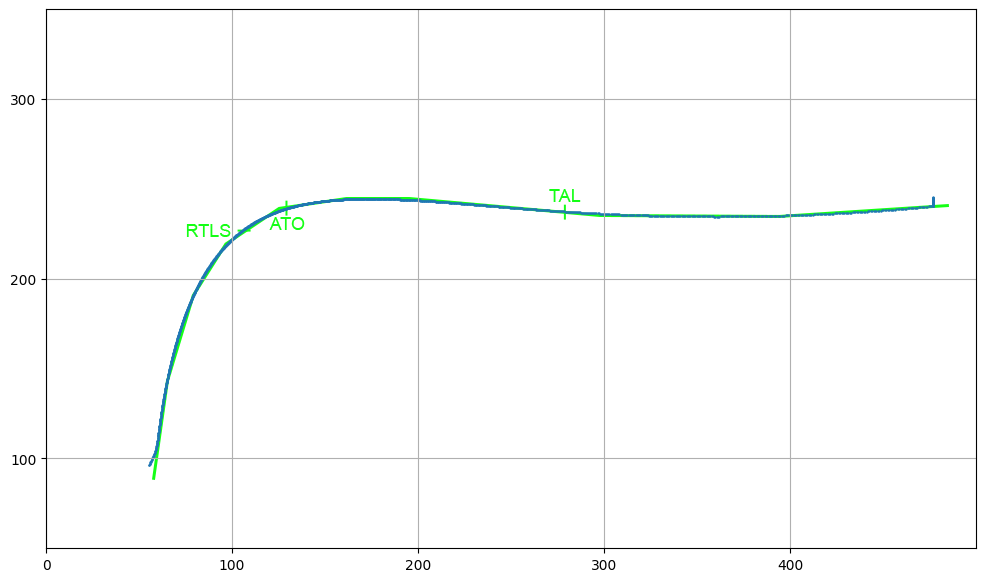

In [7]:
ascent_traj_disp(2, data)